In [90]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

Importing csv and printing the raw data

In [91]:
data = pd.read_csv("50_Startups.csv")
orig_data = data

In [92]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Checking for null values

In [93]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

checking for duplicates

In [94]:
dupes = data.duplicated()
dupes.sum()

0

no duplicates found

In [95]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [96]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [97]:
data = pd.get_dummies(data, columns=['State'])

converting state column to one hot encoding

In [98]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


now we check for outliers in the data

using zscores

In [99]:
numeric_columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

for column in numeric_columns:
    mean = data[column].mean()
    sd = data[column].std()
    z_score_outliers = [i for i in zscore(data[column]) if (i > 3) or (i < -3)]
    
    print(f"Column: {column}")
    print("Mean:", mean)
    print("Standard Deviation:", sd)
    print("Z-score Outliers:", z_score_outliers)
    print()


Column: R&D Spend
Mean: 73721.6156
Standard Deviation: 45902.25648230753
Z-score Outliers: []

Column: Administration
Mean: 121344.63960000001
Standard Deviation: 28017.802755488683
Z-score Outliers: []

Column: Marketing Spend
Mean: 211025.09780000002
Standard Deviation: 122290.31072584528
Z-score Outliers: []

Column: Profit
Mean: 112012.63920000002
Standard Deviation: 40306.18033765055
Z-score Outliers: []



we find no outliers in the values

we can also verify this by plotting the columns in box plots

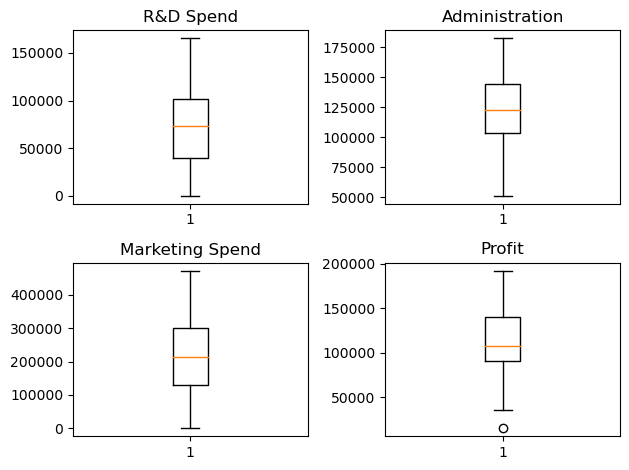

In [103]:
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [83]:
preprocessed_data = data

In [84]:
preprocessed_data.rename(columns={'Marketing Spend':'Marketing_Spend',
'R&D Spend':'R&D_Spend'},inplace=True)

In [85]:
preprocessed_data.to_csv("50_Startups_Preprocessed.csv", index=False)

In [86]:
preprocessed_data

,R&D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0
